<h1>CS4618: Artificial Intelligence I</h1>
<h1>Decision Trees and Random Forests</h1>
<h2>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h2>

<h1>Initialization</h1>
$\newcommand{\Set}[1]{\{#1\}}$ 
$\newcommand{\Tuple}[1]{\langle#1\rangle}$ 
$\newcommand{\v}[1]{\pmb{#1}}$ 
$\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ 
$\newcommand{\rv}[1]{[#1]}$ 
$\DeclareMathOperator{\argmax}{arg\,max}$ 
$\DeclareMathOperator{\argmin}{arg\,min}$ 
$\DeclareMathOperator{\dist}{dist}$
$\DeclareMathOperator{\abs}{abs}$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier

In [3]:
import os
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  base_dir = "./drive/My Drive/Colab Notebooks/" # You may need to change this, depending on where your notebooks are on Google Drive
else:
  base_dir = "." 

<h1>Acknowledgement</h1>
<ul>
        <li>The random forest diagram is based on one in A. G&eacute;ron: <i>Hands-On Machine Learning with Scikit-Learn, Keras &amp;, TensorFlow (2nd edn)</i>, O'Reilly, 2019.
    </li>
</ul>

<h1>Decision Trees</h1>
<ul>
    <li><b>Decision Trees</b> are very popular in Machine Learning.</li>
    <li>They can be used for regression and for classification.</li>
    <li>In the case of classification, they can be used for binary classification or for multiclass
        classification (so you don't need one-versus-rest or one-versus-all).
    </li>
    <li>They are more complex than linear models and so can better fit complex datasets.
    </li>
    <li>Many people claim that they produce <b>interpretable</b> models &mdash; see later in this lecture.</li>
    <li><b>Random Forests</b> are another popular model in Machine Learning, and they contain
        Decision Trees &mdash; see later in this lecture.
    </li>
</ul>

<h1>Decision Trees for the CS1109 Dataset</h1>

In [4]:
# Use pandas to read the CSV file into a DataFrame
cs1109_df = pd.read_csv(os.path.join(base_dir, "../datasets/dataset_cs1109.csv"))

In [5]:
# The features
cs1109_features = ["lect", "lab", "cao"]

# Extract the features
cs1109_X = cs1109_df[cs1109_features].values

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
cs1109_y = label_encoder.fit_transform(cs1109_df["outcome"])

In [6]:
# Create the Decision Tree object
tree_classifier = DecisionTreeClassifier(max_depth=3)

# Fit the model. Note that scaling of the data is not needed.
tree_classifier.fit(cs1109_X, cs1109_y)

DecisionTreeClassifier(max_depth=3)

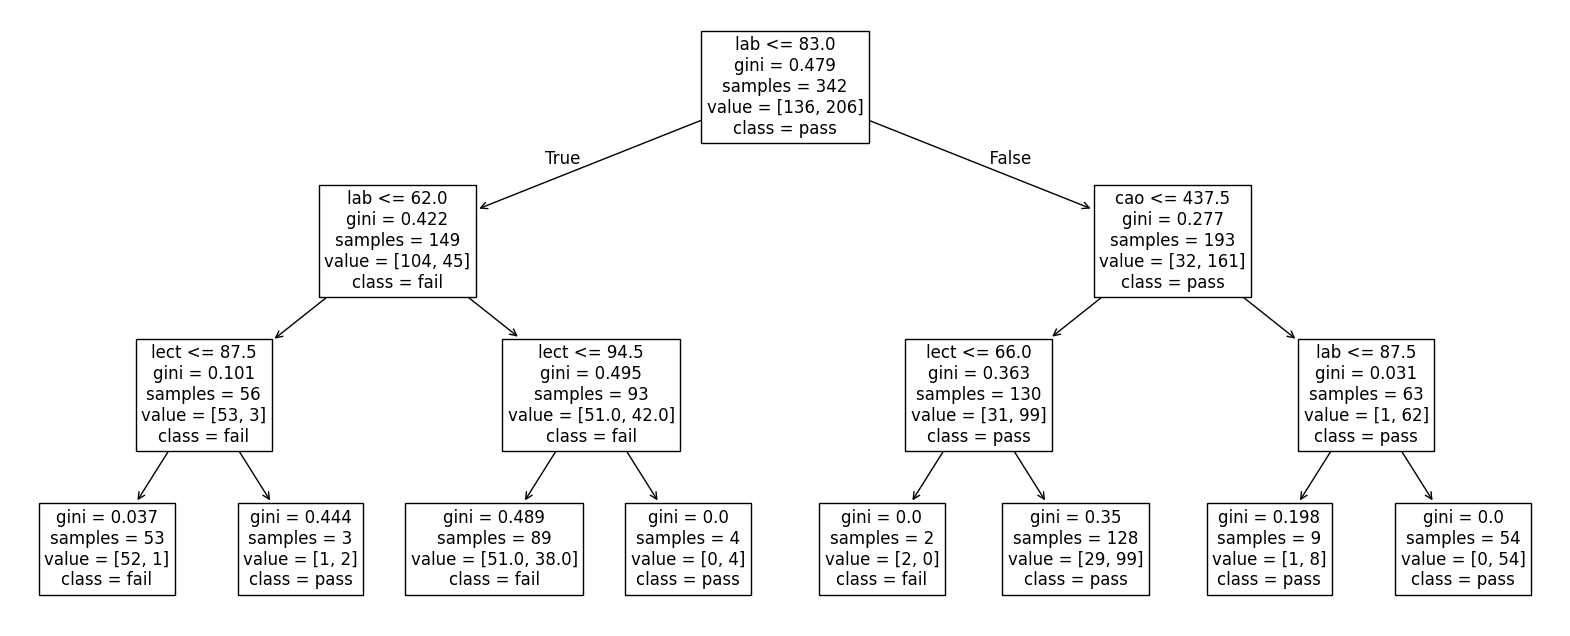

In [7]:
# Draw it
fig = plt.figure(figsize=(20,8))
plot = plot_tree(tree_classifier, feature_names=cs1109_df.columns.tolist(), class_names=["fail", "pass"], fontsize=12)
plt.show()

<h2>Classification using a Decision Tree</h2>
<ul>
    <li>Do you remember Craig?
        <ul>
            <li>He attended 60% of lectures, 25% of labs and has 500 CAO points.</li>
        </ul>
    </li>
    <li>Inference: What does the Decision Tree predict?
        <ul>
            <li>Start at the root: is Craig's lab attendance &le; 83%?</li>
            <li>Yes, so move left: is his lab attendance &le; 62%?</li>
            <li>Yes, so move left: is his lecture attendance &le; 87.5%?</li>
            <li>Yes, so move left: he fails.</li>
        </ul>
    </li>
    <li>What about Chiyo?</li>
</ul>

In [8]:
students = np.array([[60, 25, 500],[80, 90, 350]])

In [9]:
label_encoder.inverse_transform(tree_classifier.predict(students))

array(['fail', 'pass'], dtype=object)

<h2>Reading the nodes of the tree (not important in <i>CS4618</i>)</h2>
<ul>
    <li><code>samples</code>: how many training examples the node applies to.
        <ul>
            <li>E.g. 149 training examples have lab attendance &le; 83%.</li>
        </ul>
    </li>
    <li><code>value</code>: how many training examples of each class this node applies to.
        <ul>
            <li>E.g. [45, 104] means this node applies to 45 people who failed and 104 who passed.</li>
        </ul>
    </li>
    <li><code>gini</code>: is the <b>Gini impurity</b> of a node (with values in $[0.0, 0.5]$):
        <ul>
            <li>it measures how often an example would be incorrectly labeled if it was randomly labeled 
                according to the distribution of labels for this node;
            </li>
            <li>e.g. gini of 0 means no impurity: all examples that this node applies to belong to the 
                same class;
            </li>
            <li>Google the formula, if interested (and make sure you're reading about Gini Impurity or the
                Gini index, not the Gini coefficient!).
            </li>
        </ul>
    </li>
</ul>

<h2>Depth of a Decision Tree</h2>
<ul>
    <li><code>max_depth</code> is a <b>hyperparameter</b>.</li>
    <li>Increasing <code>max_depth</code> increases complexity.</li>
    <li>It follows that increasing <code>max_depth</code> too much will result in overfitting.</li>
    <li>If there is no constraint on tree depth, then branches will be grown until all leaves are pure.
    </li>
</ul>

<h1>Decision Trees for the Cork Property Prices Dataset</h1>

<ul>
    <li>Let's quickly see a Decison Tree for regression.</li>
</ul>

In [11]:
# Use pandas to read the CSV file into a DataFrame
cork_df = pd.read_csv(os.path.join(base_dir, "../datasets/dataset_corkA.csv"))

In [12]:
# The features
cork_features = ["flarea", "bdrms", "bthrms"]

# Extract the features
cork_X = cork_df[cork_features].values

# Target values, converted to a 1D numpy array
cork_y = cork_df["price"].values

In [13]:
# Create the Decision Tree object
tree_regressor = DecisionTreeRegressor(max_depth=3)

# Fit the model. Note that scaling of the data is not needed.
tree_regressor.fit(cork_X, cork_y)

DecisionTreeRegressor(max_depth=3)

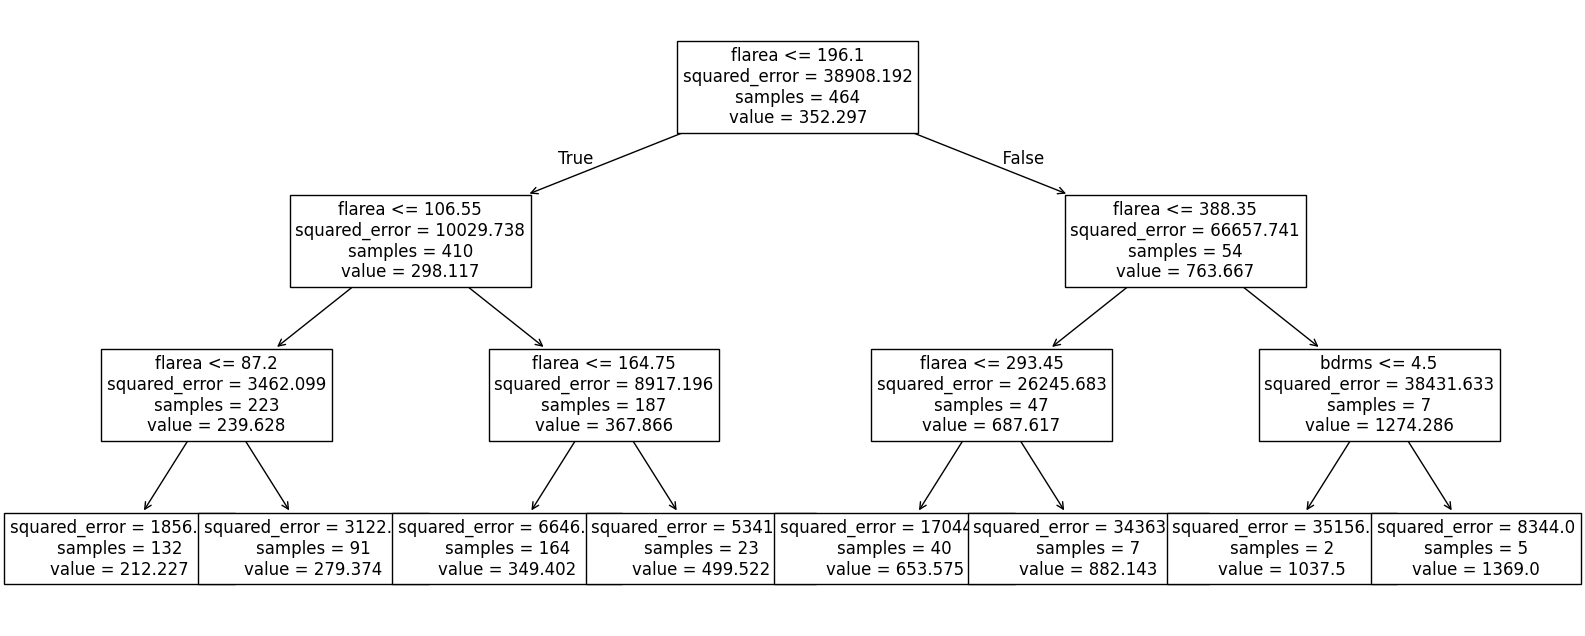

In [14]:
# Draw it
fig = plt.figure(figsize=(20,8))
plot = plot_tree(tree_regressor, feature_names=cork_df.columns.tolist(), fontsize=12)
plt.show()

<h2>Regression using a Decision Tree</h2>
<ul>
    <li>Are you still trying to sell your house?
        <ul>
            <li>126 square metres of floor area, 3 bedrooms, 1 bathroom</li>
        </ul>
    </li>
    <li>Inference: What does the Decision Tree predict?
        <ul>
            <li>Start at the root and follow the decisions down to a leaf.</li>
            <li>At any node, <code>value</code> is the prediction and is simply the mean target values of 
                the training examples that the node applies to.
            </li>
        </ul>
    </li>
</ul>

<h1>Learning a Decision Tree</h1>
<ul>
    <li>scikit-learn uses the CART Algorithm  (<i>Classification and Regression Tree</i>). We
        will describe this, but only in high-level terms.
        <ul>
            <li>It only produces binary trees (hence yes/no questions in
                non-leaf nodes);
            </li>
            <li>it is recursive; and</li>
            <li>it is greedy.</li>
        </ul>
    </li>
    <li>There are other algorithms (e.g. ID3, which can produce non-binary trees) and all sorts of
        variants (e.g. C4.5 is like CART but uses entropy in place of Gini), including ones that
        can directly handle nominal-valued features and missing values, which we will not study.
    </li>
    <li>Below, we show the CART Algorithm for classification.
        <ul>
            <li>For regression, the only difference is the loss function: in place of Gini it uses the
                mean squared error between the $y$-values of the training examples and their mean.
            </li>
        </ul>
    </li>
    <li>Note we do not need to scale the data before using this algorithm.</li>
</ul>

<h2>The CART Training Algorithm</h2>
<ul>
    <li>For each feature $x_i$ and each value $v$, split the dataset into two:
        <ul>
            <li>$X_{\mathit{left}}$ are the examples in $X$ for which $x_i \leq v$</li>
            <li>$X_{\mathit{right}}$ are the examples in $X$ for which $x_i > v$</li>
        </ul>
        and calculate the CART loss function: 
        $\frac{|X_{\mathit{left}}|}{|X|}\mbox{Gini}(X_{\mathit{left}}) + 
         \frac{|X_{\mathit{right}}|}{|X|}\mbox{Gini}(X_{\mathit{right}})$
    </li>
    <li>From the above, choose the feature $x_i$ and  value $v$ with lowest loss</li>
    <li>If a stopping criterion has been reached (e.g. maximum depth or if no split reduces impurity) then
        <ul>
            <li>return</li>
        </ul>
        Else
        <ul>
            <li>Recursively call CART on $X_{\mathit{left}}$</li>
            <li>Recursively call CART on $X_{\mathit{right}}$</li>
        </ul>
    </li>
</ul>

<h2>Discussion: Efficiency</h2>
<ul>
    <li>Learning is $O(mn \log_2 m)$ for the basic CART algorithm above.
        <ul>
            <li>Of course, hyperparameters such as a maximum depth can speed-up learning.</li>
        </ul>
    </li>
    <li>Inference (prediction) is roughly $O(\log_2 m)$ (which is the depth of tree, assuming the tree is
        balanced, which it often, approximately, is). This is fast!
    </li>
</ul>

<h1>Discussion: Interpretability</h1>
<ul>
    <li>The model is <b>interpretable</b>: 
        <ul>
            <li>we can display the tree and people can see what has been learned.</li>
        </ul>
    </li>
    <li>An individual prediction is <b>explainable</b>:
        <ul>
            <li>we can display the path through the tree.</li>
        </ul>
    </li>
    <!--
    <li>We might discuss this further in a later lecture.</li>
    -->
</ul>

<h1>Ensembles</h1>
<img style="float:right" src="images/jar.jpg" />
<ul>
    <li>We can <em>combine</em> models into what is called an <b>ensemble</b>.
        <ul>
            <li>The ensemble often out-performs the individual models that it contains.
                <ul>
                    <li>The <em>wisdom of the crowd</em>.
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Ensembles can turn <b>weak learners</b> into <b>strong learners</b>.
        <ul>
            <li>Weak learners: one that are doing only slightly better than random.</li>
            <li>Strong learners: ones with much higher accuracy/lower error than chance.</li>
        </ul>
    </li>
    <li>If this is to happen, there needs to be diversity among the individual models.</li>
</ul>

<h2>Various approaches</h2>
<ul>
    <li>The simplest approach, e.g. for classification:
        <ul>
            <li>Train several different classifiers (e.g. Logistic Regression, Decision Tree, others);</li>
            <li>At prediction time, each model classifies the example;</li>
            <li>They vote on the result.</li>
        </ul>
        If you want to try this: <code>VotingClassifier</code> in scikit-learn.
    </li>
    <li>But the main ways of building ensembles are: 
        <ul>
            <li>bagging (e.g. Random Forests below)</li>
            <li>boosting (not covered)</li>
            <li>stacking (not covered)</li>
        </ul>
        They are general techniques, applicable to both regression and classification.
    </li>
</ul>

<h2>Random Forests</h2>
<ul>
    <li>Random Forests use <b>bagging</b>.</li>
    <li>Bagging ('bootstrap aggregating'):
        <ul>
            <li>Train several models of the same kind (e.g. several Decision Tree classifiers).</li>
            <li>But do so on different random subsamples of the training set (chosen <em>with replacement</em>).</li>
        </ul>
        <img src="images/bagging.png" />
    </li>
    <li>To make a prediction for a new example:
        <ul>
            <li>Classification: take a vote.</li>
            <li>Regression: compute their mean.</li>
         </ul>
     </li>
</ul>

<h2>How many trees in a forest?</h2>
<ul>
    <li>The number of Decision Trees to use in the ensemble is a hyperparameter!</li>
    <li>To some extent, 'the more, the merrier': 
        <ul>
            <li>Predictions typically become more reliable as the ensemble gets larger.</li>
            <li>Seldom is the accuracy of the ensemble lower than the accuracy of any of its members
                &mdash; but this is <em>not guaranteed</em>
            </li>
            <li>In practice, you can either guess how many to use or 
                choose its value using grid search or randomized search.
            </li>
         </ul>
     </li>
     <li>If you want to try bagging in scikit-learn there are <code>BaggingClassifier</code> 
         and <code>BaggingRegressor</code> classes.
    </li>
     <li>But if you want to try bagging for Decision Trees, i.e. a random forest, there is a convenience class
         <code>RandomForest</code>.
        <ul>
            <li>The number of trees (<code>n_estimators</code>) and the depth of those trees 
                (<code>max_depth</code>) are among many hyperparameters.
            </li>
        </ul>
    </li>
    <li>scikit-learn's Random Forests increase diversity
        <ul>
            <li>Not only do they train on different random subsamples of the training set&hellip;</li>
            <li>But also, when building the model, they don't select the best feature for splitting; they
                select among a random subset of the features. 
            </li>
            <li>You will get different models every time unless you seed the random state.</li>
        </ul>
    </li>
</ul>

In [15]:
# Create the Random Forest object
forest_classifier = RandomForestClassifier(n_estimators=30, max_depth=3, random_state=2)

# Fit the model. Note that scaling of the data is not needed.
forest_classifier.fit(cs1109_X, cs1109_y)

RandomForestClassifier(max_depth=3, n_estimators=30, random_state=2)

In [16]:
label_encoder.inverse_transform(forest_classifier.predict(students))

array(['fail', 'pass'], dtype=object)

<ul>
    <li>You may know of Kaggle (<a href="https://www.kaggle.com/">https://www.kaggle.com/</a>), a site that hosts machine learning competitions.
    </li>
    <li>Some of the competition datasets are what some people call structured datasets (or what other people call tabular datasets), like the ones we've been using so far.</li>
    <li>Random Forests were often a winning approach for these kinds of datasets.</li>
    <li>Probably nowadays, a different ensemble, Gradient Boosted Trees, are the winners for these kinds of datasets.
        <ul>
            <li>We have not time to study these. But, if you want to try them&hellip;</li>
            <li>In scikit-learn, use the <code>GradientBoostedClassifier</code> and <code>GradientBostedRegressor</code> classes.</li>
            <li>Other implementations are, arguably, even more popular:
                <a href="https://xgboost.readthedocs.io/en/stable/">XGBoost</a>, <a href="https://xgboost.readthedocs.io/en/stable/">LightGBM</a>.
            </li>
        </ul>
    </li>
    <li>For competitions that use other kinds of datasets (images, video, audio), neural networks and deep learning are now the typical winners.
    </li>
</ul>

<h1>Appendix</h1>
<h2>Parametric learning vs. non-parametric learning</h2>
<ul>
    <li><b>Parametric learning</b>: the number of parameters is known prior to training and is not affected by
        $m$ the number of examples in the training set.
        <ul>
            <li>E.g. Linear Regression the number of parameters is $n + 1$</li>
            <li>E.g. Polynomial Regression the number of parameters is $\frac{(n+d)!}{d!n!}$</li>
        </ul>
    </li>
    <li><b>Non-parametric learning</b>: the number of parameters is not known in advance and may grow with
        the size of the training set.
        <ul>
            <li>E.g. For Decision Trees, in some sense, the nodes are the parameters: the structure of the
                model (tree) may grow to accommodate the complexity of the training data.
            </li>
            <li>E.g. For kNN, in some sense, the neighbours are the parameters and the more training examples
                there are, the more different possible sets of neighbours there are.
        </ul>
    </li>
    <li>This does not mean that non-parametric models will have lower validation error. 
        <ul>
            <li>Unconstrained, they are prone to overfitting.</li>
            <li>So we want to impose some constraints on the CART algorithm to restrict the shape
                of the Decision Tree (such as maximum depth and others).
            </li>
            <li>Similarly, we avoid small values for $k$ in KNN.</li>
        </ul>
    </li>
</ul>